# Project Title: IPL Data Analysis

## Name: SANKARANAND S
### Organization: Entri Elevate
### Date: 28/05/2024


#### 1) Overview of Problem Statement

##### The dataset covers the IPL from 2008 to 2019, offering stats on player performance,match outcomes, and team details. It's a valuable resource for analyzing the performance of players and teams over the years,providing insights into one of cricket's most popular tournaments.

#### 2) Objective

##### The objective is to understand the role of toss decisions in determining match outcomes and to provide actionable insights.

#### Target Variable:-
##### Winner



#### 3) Description

#### -Source :
### Kaggle

#### -Features:
##### id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3

#### 4) Data Collection

In [278]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [279]:
ipl=pd.read_csv("matches.csv")
ipl

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


#### 5) Data Preprocessing

In [280]:
#checking null values
ipl.isnull().sum()


id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### Removing unwanted data

##### In the 'Seasons' column, the prefix 'IPL' is attached to the year. Removing 'IPL' from the column would allow it to be used for year-wise data. Additionally, since the 'Umpire3' column contains numerous NaN values, it can be dropped.¶

In [281]:
ipl.Season = ipl.Season.str.replace('IPL-', '').astype(int)


In [282]:
ipl.drop(columns=["umpire3"], inplace = True)

In [283]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


#### Replacing records that do not have valid information with "NaN.".

In [284]:
ipl_NaN = ipl.isnull()
row_has_NaN = ipl_NaN.any(axis=1)
rows_with_NaN = ipl[row_has_NaN]
rows_with_NaN

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
461,462,2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
545,546,2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak


In [285]:
ipl.dropna(inplace=True)
ipl.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

##### Detecting Outliers

In [286]:
z_scores = np.abs(stats.zscore(ipl.select_dtypes(include=[np.number])))

threshold = 3
outliers = ipl[(z_scores > threshold).any(axis=1)]
outliers

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
8,9,2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
43,44,2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan
56,57,2017,Bangalore,17-05-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon
59,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
99,100,2008,Delhi,17-05-2008,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen
102,103,2008,Kolkata,18-05-2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan
114,115,2008,Mumbai,30-05-2008,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen
119,120,2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
121,122,2009,Port Elizabeth,20-04-2009,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,92,0,M Muralitharan,St George's Park,BG Jerling,SJA Taufel
122,123,2009,Durban,21-04-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade


In [287]:
#calculation of first quartile
q1=ipl["win_by_runs"].quantile(0.25)
q1

0.0

In [288]:
#calculation of third quartile
q3=ipl["win_by_runs"].quantile(0.75)
q3

19.0

In [289]:
#calculation of IQR
iqr=q3-q1
iqr

19.0

In [290]:
#lower and upper bound outlier detection

lower_bound=q1-1.5*iqr
lower_bound

-28.5

In [291]:
upper_bound=q3+1.5*iqr
upper_bound

47.5

In [292]:
#detection of outliers
outliers_iqr=ipl[(ipl["win_by_runs"]<lower_bound)|(ipl["win_by_runs"]>upper_bound)]

In [293]:
#removal of outliers
cleaned_iqr=ipl[~ipl["win_by_runs"].isin(outliers_iqr["win_by_runs"])]
cleaned_iqr

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05-05-2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin
751,11347,2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
754,11414,2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [294]:
#printing number of outliers detected
print("Outliers Detected Using IQR Method ; " ,len(outliers_iqr))

Outliers Detected Using IQR Method ;  58


In [295]:
# Calculate skewness for numerical columns
skewness = ipl[['win_by_runs', 'win_by_wickets']].skew()
print("Skewness:")
print(skewness)

Skewness:
win_by_runs       2.525273
win_by_wickets    0.258489
dtype: float64


#### Z-Score Outlier Detection:

###### Z-score is calculated for numerical columns in the dataset.Threshold for outlier detection is set at 3.Outliers are identified based on z-scores exceeding this threshold.

#### IQR (Interquartile Range) Outlier Detection:

###### First quartile (Q1), third quartile (Q3), and IQR are calculated for the "win_by_runs" column.Lower and upper bounds for outlier detection are determined using the IQR method.Outliers are identified based on values falling below the lower bound or above the upper bound.

#### Skewness Calculation:

###### Skewness values are calculated for the columns "win_by_runs" and "win_by_wickets".Skewness indicates the asymmetry in the distribution of data. Positive skewness implies a tail on the right side of the distribution, while negative skewness implies a tail on the left side.

#### Outcome:

###### Detected outliers using both Z-score and IQR methods.Skewness of numerical columns is assessed.Overall, the script provides a comprehensive overview of outlier detection and skewness assessment, which are essential steps in data preprocessing and analysis.

#### Exploratory Data Analysis

In [296]:
ipl.describe() # summary statistics

,id,Season,dl_applied,win_by_runs,win_by_wickets
count,743.000000,743.000000,743.000000,743.000000,743.000000
mean,1786.578735,2013.418573,0.025572,13.460296,3.375505
std,3455.045846,3.378787,0.157961,23.626205,3.393397
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,187.500000,2011.000000,0.000000,0.000000,0.000000
50%,374.000000,2013.000000,0.000000,0.000000,4.000000
75%,567.500000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [297]:
ipl.info() # to display data types and missing values

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               743 non-null    int64 
 1   Season           743 non-null    int32 
 2   city             743 non-null    object
 3   date             743 non-null    object
 4   team1            743 non-null    object
 5   team2            743 non-null    object
 6   toss_winner      743 non-null    object
 7   toss_decision    743 non-null    object
 8   result           743 non-null    object
 9   dl_applied       743 non-null    int64 
 10  winner           743 non-null    object
 11  win_by_runs      743 non-null    int64 
 12  win_by_wickets   743 non-null    int64 
 13  player_of_match  743 non-null    object
 14  venue            743 non-null    object
 15  umpire1          743 non-null    object
 16  umpire2          743 non-null    object
dtypes: int32(1), int64(4), object(12)
memory

In [298]:
# Unique Values
ipl["city"].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Mumbai', 'Kolkata',
       'Bangalore', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Mohali', 'Bengaluru'], dtype=object)

In [299]:
ipl["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [300]:
ipl["team2"].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [301]:
ipl["winner"].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [302]:
#Finding which team won by maximum number of wickets
ipl.iloc[ipl['win_by_wickets'].idxmax()]

id                                                      3
Season                                               2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

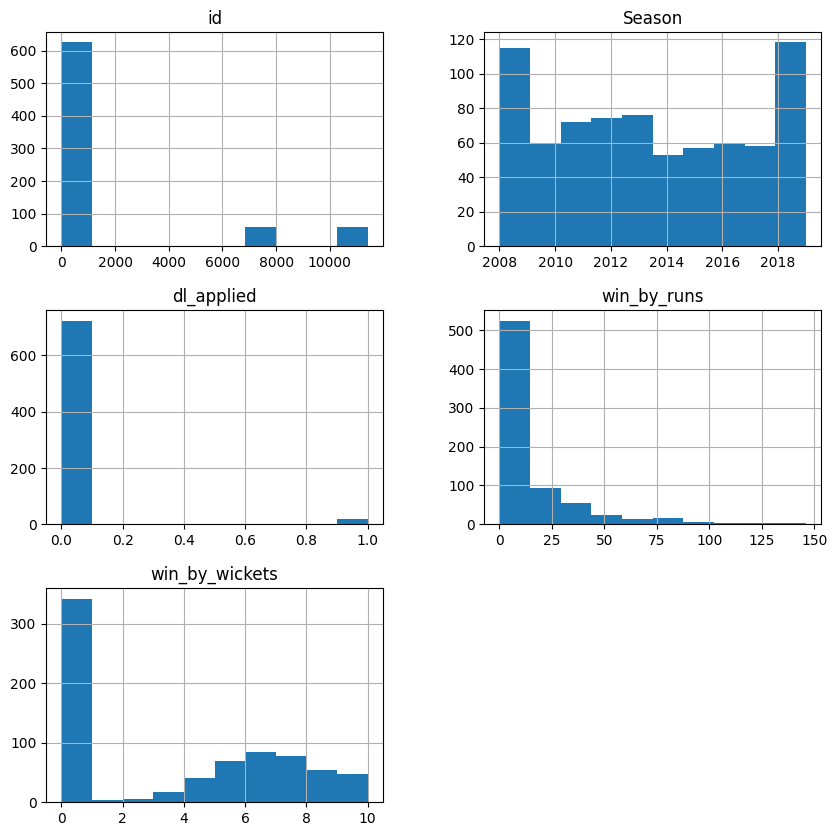

In [303]:
#distribution of feature of summary data
ipl.hist(figsize = (10,10))
plt.show()

###### Win_by_wickets is almost normally distributed (except for '0' as it happens when teams are winning by runs). This shows that most of the times teams win by 7 wickets.
Win_by_runs is skewed to the right which implies that the teams win by small margin of runs (between 0 to 25) than that of higher runs margins.

Text(0.5, 1.0, 'Distribution of Win by Runs')

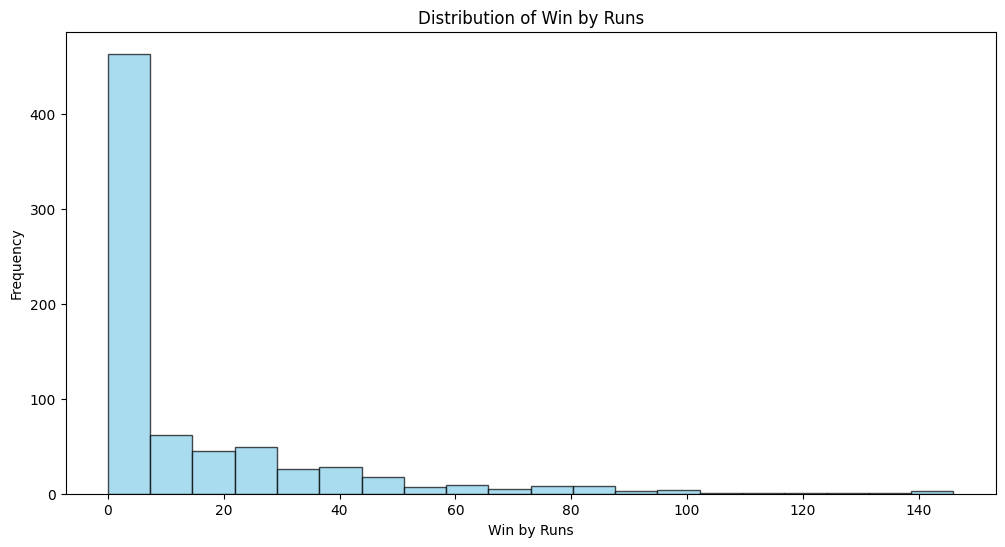

In [304]:
# Distribution of Variables
plt.figure(figsize=(12, 6))

# Plot histogram for "win_by_runs"
plt.hist(ipl["win_by_runs"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Win by Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Win by Runs')

Text(0.5, 1.0, 'Distribution of Win by Wickets')

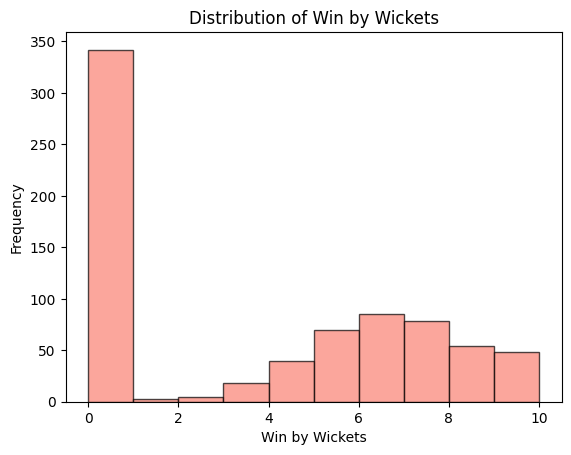

In [305]:
# Plot histogram for "win_by_wickets"
plt.hist(ipl["win_by_wickets"], bins=10, color='salmon', edgecolor='black', alpha=0.7)
plt.xlabel('Win by Wickets')
plt.ylabel('Frequency')
plt.title('Distribution of Win by Wickets')

In [306]:
# Correlation Analysis
correlation = ipl[['win_by_runs','win_by_wickets']].corr()
print(correlation)

                win_by_runs  win_by_wickets
win_by_runs        1.000000       -0.567479
win_by_wickets    -0.567479        1.000000


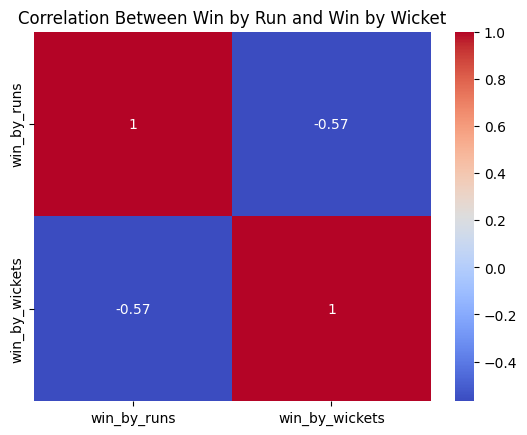

In [307]:
#Plotting heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Win by Run and Win by Wicket')
plt.show()

##### This heatmap shows that winning by runs and winning by wickets are inversely related; as the number of matches won by runs increases, the number of matches won by wickets tends to decrease, and vice versa, with a correlation of -0.57 between them.

<Axes: xlabel='count', ylabel='winner'>

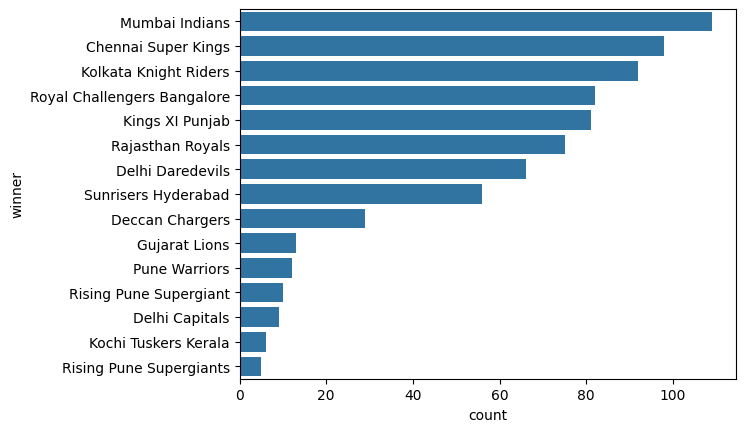

In [308]:
#which team won maximum number of times
win=ipl.winner.value_counts()
sns.barplot(y=win.index,x=win)

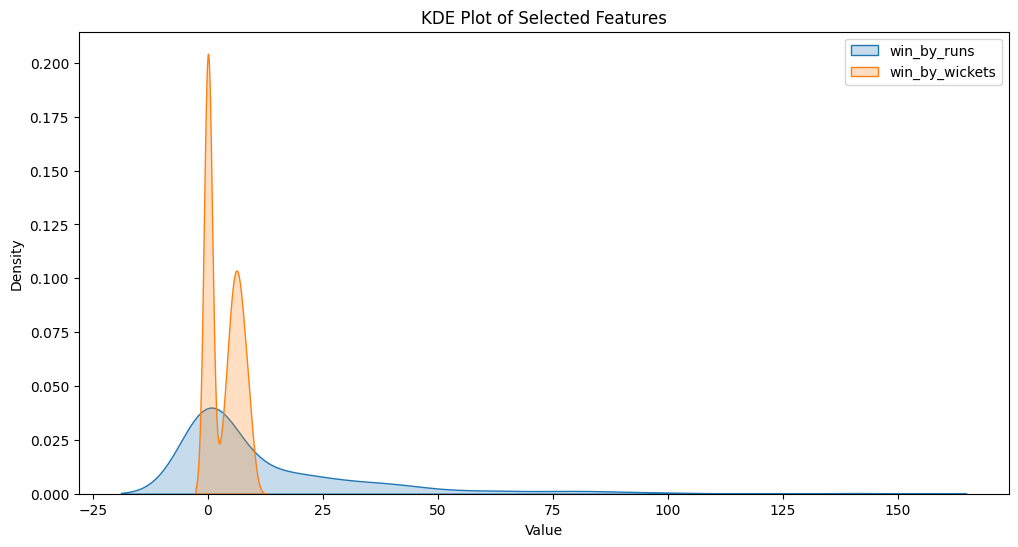

In [309]:
#KDE
# List of columns for which to plot KDE
columns_to_plot = ['win_by_runs', 'win_by_wickets']  

# Plot KDE for each column
plt.figure(figsize=(12, 6))

for column in columns_to_plot:
    sns.kdeplot(ipl[column], shade=True, label=column)

# Add title and labels
plt.title('KDE Plot of Selected Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [310]:
#Finding the probability of winning a match if the team won the toss
probability_of_win=ipl['toss_winner'] == ipl['winner']
probability_of_win.groupby(probability_of_win).size()

False    355
True     388
dtype: int64

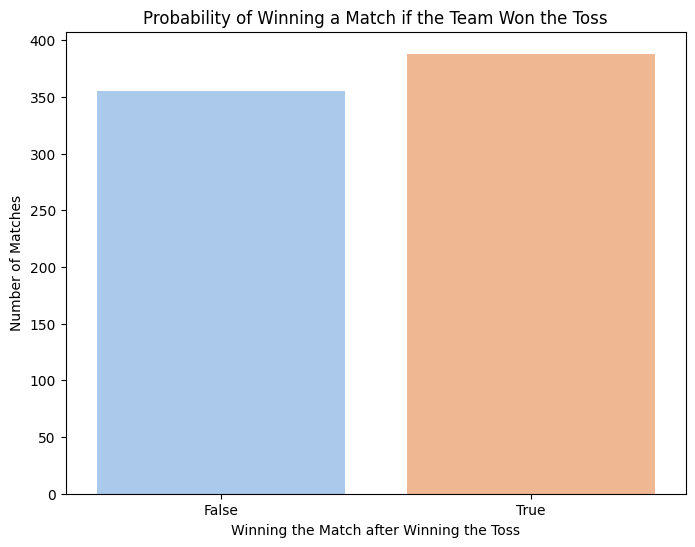

In [311]:
#Plotting the probability of winning
plt.figure(figsize=(8, 6)) 
sns.countplot(x=probability_of_win)
sns.countplot(x=probability_of_win, palette='pastel') 

# Adding labels and title
plt.title('Probability of Winning a Match if the Team Won the Toss')
plt.xlabel('Winning the Match after Winning the Toss')
plt.ylabel('Number of Matches')
# Show plot
plt.show()


In [312]:
#Finding the higher wins by teams per season
ipl.groupby('Season')['winner'].value_counts()

Season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Mumbai Indians                  7
        Delhi Daredevils                7
                                       ..
2019    Kolkata Knight Riders           6
        Kings XI Punjab                 6
        Sunrisers Hyderabad             6
        Royal Challengers Bangalore     5
        Rajasthan Royals                5
Name: count, Length: 100, dtype: int64

In [313]:
#Finding the frequency of the toss decision
ipl['toss_decision'].value_counts()

toss_decision
field    455
bat      288
Name: count, dtype: int64

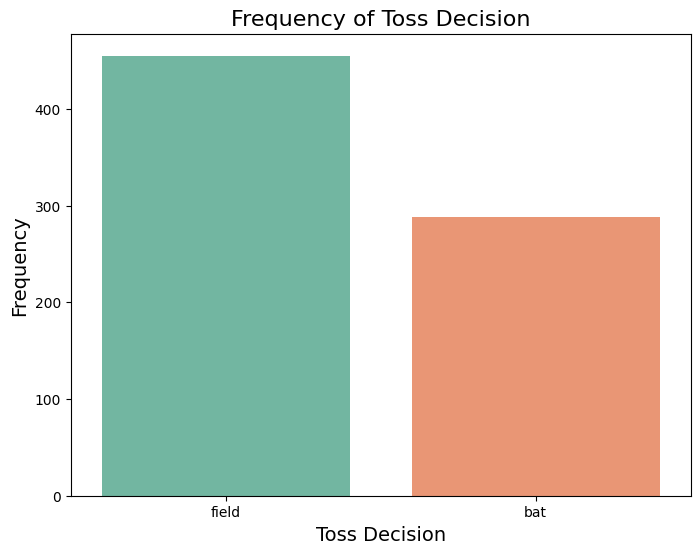

In [314]:
# Plotting the frequency of the toss decision
plt.figure(figsize=(8, 6))
sns.countplot(x='toss_decision', data=ipl, palette='Set2')

# Adding labels and title
plt.title('Frequency of Toss Decision', fontsize=16)
plt.xlabel('Toss Decision', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.show()


In [315]:
#Finding the man of the match
ipl['player_of_match'].value_counts()

player_of_match
CH Gayle           21
AB de Villiers     20
RG Sharma          17
DA Warner          17
MS Dhoni           17
                   ..
NV Ojha             1
KM Jadhav           1
AC Voges            1
AA Jhunjhunwala     1
S Hetmyer           1
Name: count, Length: 226, dtype: int64

In [316]:
#Getting the frequency of result column
ipl['result'].value_counts()

result
normal    734
tie         9
Name: count, dtype: int64

In [317]:
#Finding the number of tosses won by each team
ipl['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 96
Kolkata Knight Riders          91
Chennai Super Kings            89
Kings XI Punjab                80
Delhi Daredevils               79
Royal Challengers Bangalore    78
Rajasthan Royals               77
Sunrisers Hyderabad            45
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                  9
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: count, dtype: int64

In [318]:
#Finding the proportion for number of times a team has won the match after winning the toss
np.sum(ipl['toss_winner']==ipl['winner'])/ipl['toss_winner'].count()

0.522207267833109

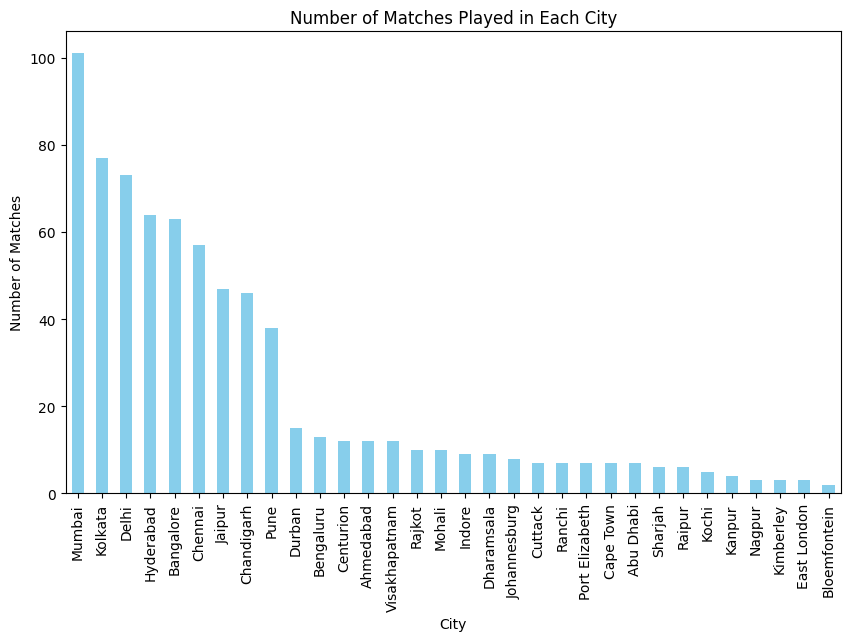

In [319]:
city_matches = ipl['city'].value_counts()
city_matches.plot(kind='bar', figsize=(10, 6), color='skyblue'  ) 
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played in Each City')
plt.show()

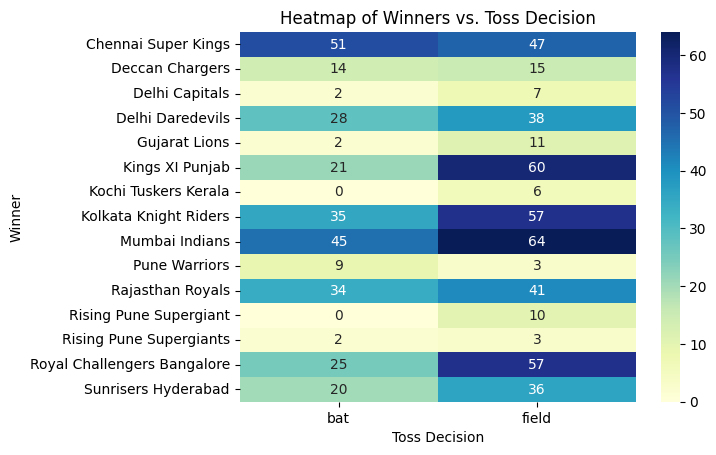

In [320]:
# Create a pivot table
pivot_table = ipl.pivot_table(index='winner', columns='toss_decision', aggfunc='size', fill_value=0)

# Plot heatmap
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Winners vs. Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Winner')
plt.show()

##### The heatmap will display a grid where each cell represents the count of matches won by a specific team after choosing a specific toss decision. The color intensity of each cell indicates the magnitude of the count, with darker colors representing higher counts.

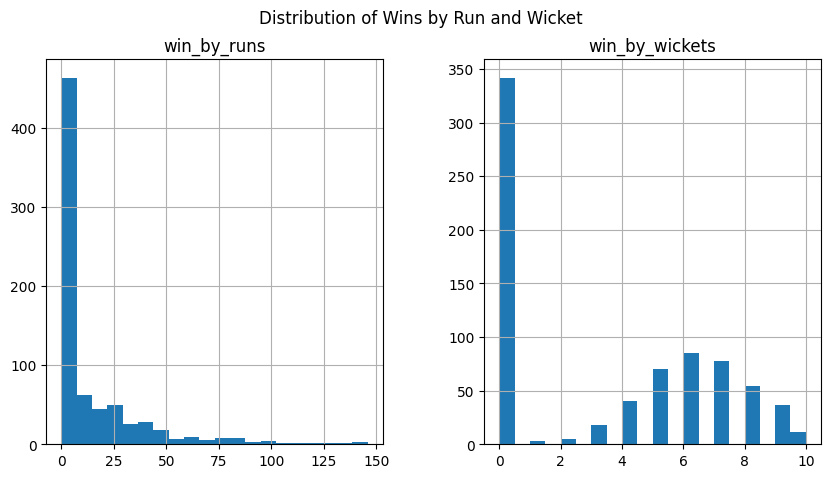

In [321]:
# Plot histograms to visualize distributions
ipl[['win_by_runs', 'win_by_wickets']].hist(bins=20, figsize=(10, 5))
plt.suptitle('Distribution of Wins by Run and Wicket')
plt.show()

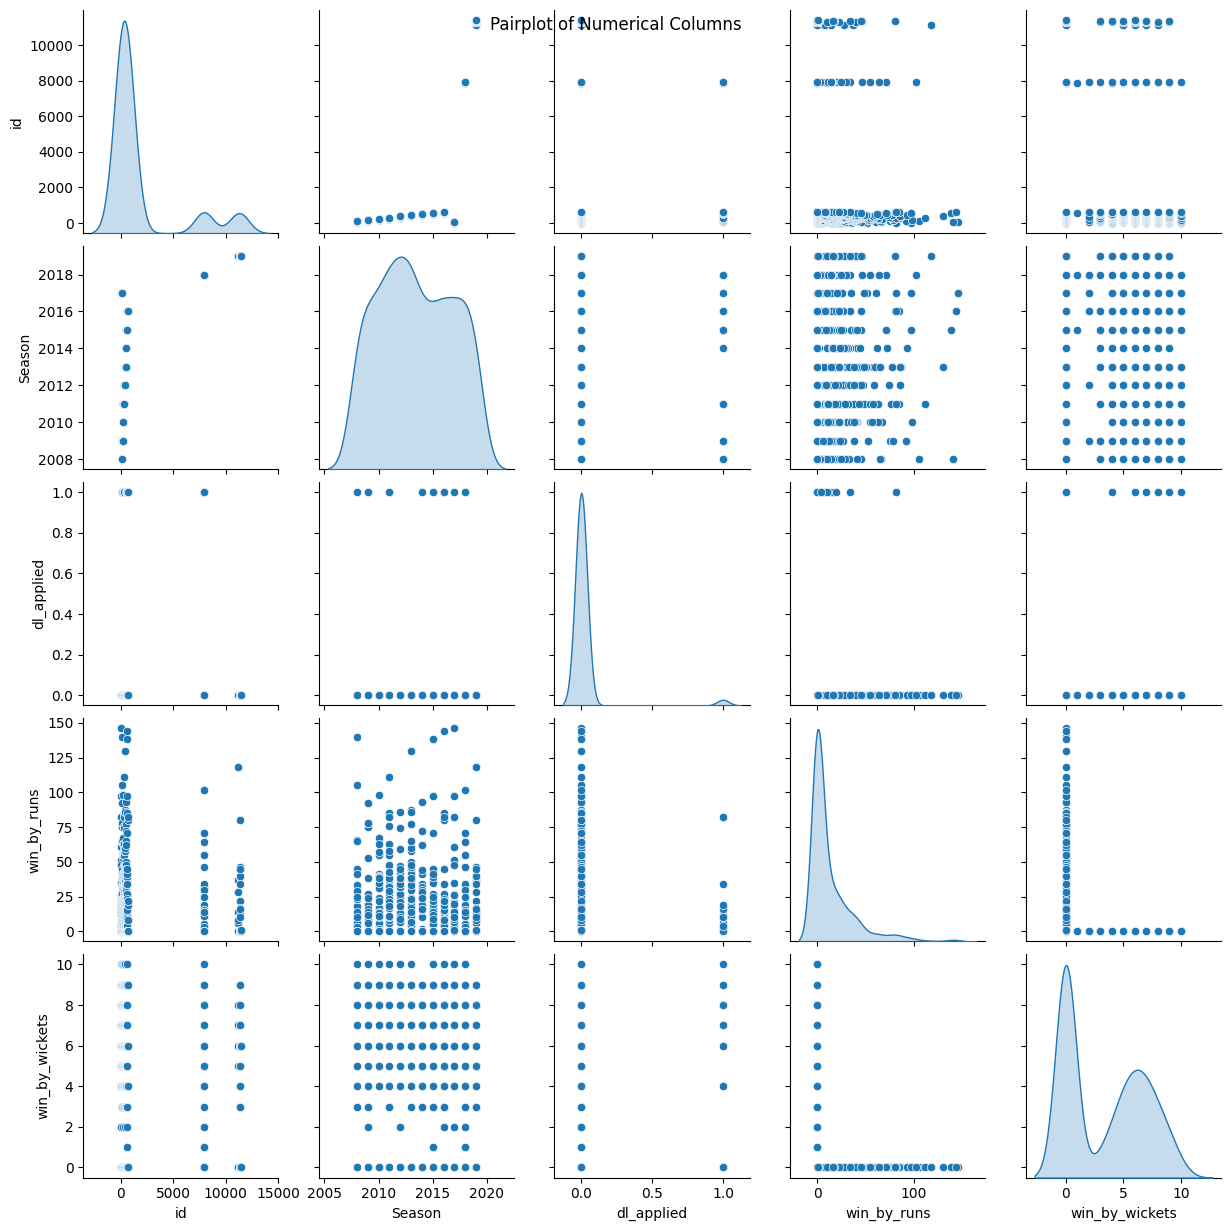

In [322]:
sns.pairplot(ipl,diag_kind='kde')
plt.suptitle('Pairplot of Numerical Columns')
plt.show()

In [323]:
#Finding the number of matches played in each season
ipl['Season'].value_counts()

Season
2013    76
2012    74
2011    72
2010    60
2016    60
2018    60
2017    58
2008    58
2019    58
2009    57
2015    57
2014    53
Name: count, dtype: int64

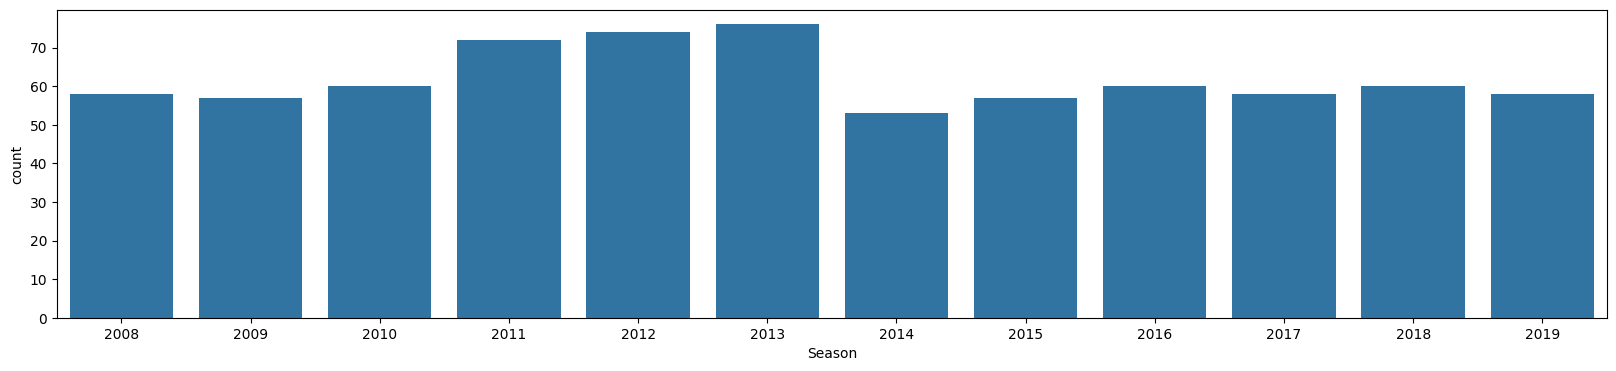

In [324]:
#Finding the season in which the highest number of matches were played
plt.figure(figsize=(20, 4))
sns.countplot(x='Season', data=ipl)
plt.show()

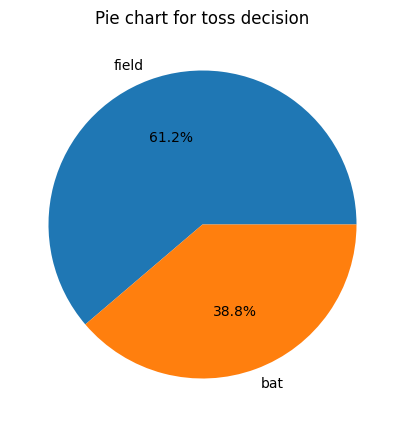

In [325]:
# Calculate the value counts of toss decisions
toss_decision_counts = ipl["toss_decision"].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(toss_decision_counts, labels=toss_decision_counts.index, autopct='%1.1f%%')
plt.title("Pie chart for toss decision")
plt.show()

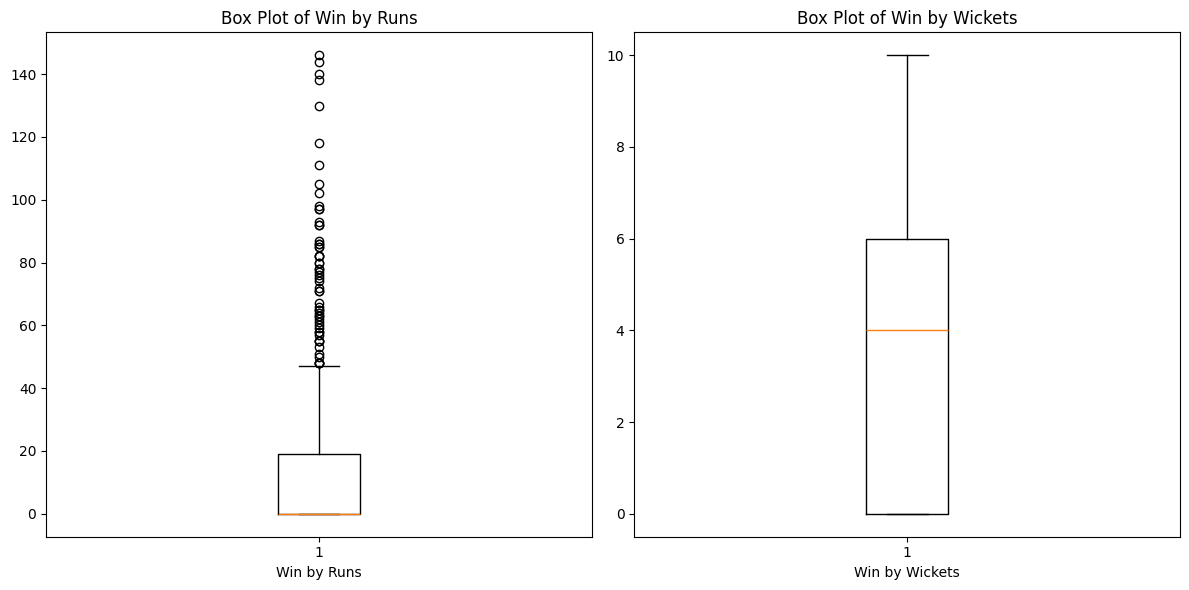

In [326]:
# Create box plots for 'Win by run' and 'Win by wicket'
plt.figure(figsize=(12, 6))

# Box plot for 'Win by runs'
plt.subplot(1, 2,1)
plt.boxplot(ipl['win_by_runs'].dropna())
plt.title('Box Plot of Win by Runs')
plt.xlabel('Win by Runs')

# Box plot for 'Win by wickets'
plt.subplot(1, 2, 2)
plt.boxplot(ipl['win_by_wickets'].dropna())
plt.title('Box Plot of Win by Wickets')
plt.xlabel('Win by Wickets')

plt.tight_layout()
plt.show()

###### This script offers a comprehensive exploration and analysis of IPL match data, covering various aspects such as team performance,match outcomes, toss decisions, and seasonal trends.It provides valuable insights into the dynamics of IPL matches over different seasons and locations.



### Feature Selection & Feature Engineering
.




In [327]:
# Label encoding all the categorical columns
label_encoder = LabelEncoder()
categorical_columns = ipl.select_dtypes(include=["object","category"]).columns
for col in categorical_columns:
    ipl[col] = label_encoder.fit_transform(ipl[col])

# Display the encoded DataFrame
print(ipl.head())

   id  Season  city  date  team1  team2  toss_winner  toss_decision  result  \
0   1    2017    14    59     14     13           13              1       0   
1   2    2017    26    75      8     11           11              1       0   
2   3    2017    28    90      4      7            7              1       0   
3   4    2017    15   109     11      5            5              1       0   
5   6    2017    14   128      4     14           14              1       0   

   dl_applied  winner  win_by_runs  win_by_wickets  player_of_match  venue  \
0           0      14           35               0              224     27   
1           0      11            0               7              199     20   
2           0       7            0              10               34     30   
3           0       5            0               6               61     12   
5           0      14            0               9              173     27   

   umpire1  umpire2  
0        6       34  
1        1  

team2              0.176711
team1              0.164898
toss_winner        0.132536
player_of_match    0.116743
city               0.113161
win_by_runs        0.094557
win_by_wickets     0.088825
Season             0.080203
toss_decision      0.024021
dl_applied         0.005549
result             0.002795
dtype: float64


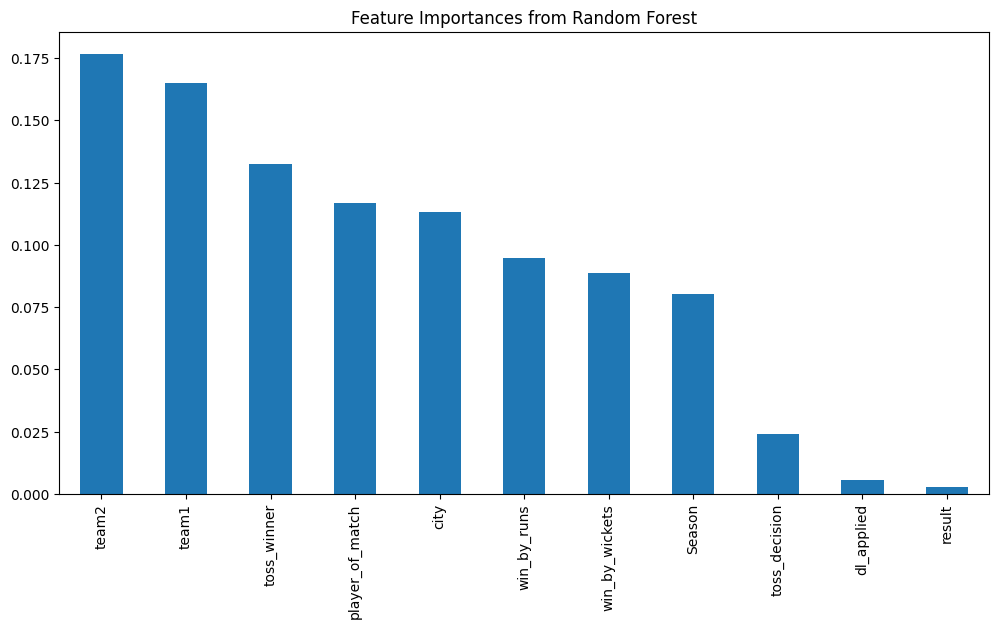

Random Forest Accuracy: 0.8117
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.67      0.75      0.71         8
           2       1.00      0.50      0.67         4
           3       0.75      0.88      0.81        17
           4       1.00      0.80      0.89         5
           5       0.75      0.86      0.80        21
           6       0.00      0.00      0.00         2
           7       0.90      0.87      0.89        31
           8       0.60      0.89      0.72        27
           9       0.00      0.00      0.00         2
          10       0.92      0.74      0.82        31
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         1
          13       0.89      0.80      0.84        30
          14       0.80      1.00      0.89        12

    accuracy                           0.81       223
   macro avg       0.62   

In [328]:
# Drop columns that are not relevant for prediction
ipl.drop(['id', 'date', 'venue', 'umpire1', 'umpire2'], axis=1, inplace=True)

# Splitting dataset 
X = ipl.drop('winner', axis=1) 
y = ipl['winner']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

# Plot feature importances
feature_importances.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances from Random Forest')
plt.show()

# Make predictions and evaluate
y_pred = rf.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print("Classification Report:")
print(classification_report(y_test,y_pred))

### Feature Scaling:

In [329]:
# Display the first few rows of the dataset
print(ipl.head())

# List of numerical columns to scale
numerical_cols = ['win_by_runs', 'win_by_wickets', 'toss_decision']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
ipl[numerical_cols] = scaler.fit_transform(ipl[numerical_cols])

# Display the first few rows of the scaled dataset
print(ipl.head())

   Season  city  team1  team2  toss_winner  toss_decision  result  dl_applied  \
0    2017    14     14     13           13              1       0           0   
1    2017    26      8     11           11              1       0           0   
2    2017    28      4      7            7              1       0           0   
3    2017    15     11      5            5              1       0           0   
5    2017    14      4     14           14              1       0           0   

   winner  win_by_runs  win_by_wickets  player_of_match  
0      14           35               0              224  
1      11            0               7              199  
2       7            0              10               34  
3       5            0               6               61  
5      14            0               9              173  
   Season  city  team1  team2  toss_winner  toss_decision  result  dl_applied  \
0    2017    14     14     13           13            1.0       0           0   
1  

### Splitting Data

In [330]:
# Display the first few rows of the dataset
print(ipl.head())

# List of numerical columns to scale
numerical_cols = ['win_by_runs', 'win_by_wickets', 'toss_decision']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
ipl[numerical_cols] = scaler.fit_transform(ipl[numerical_cols])


X = ipl.drop('win_by_runs', axis=1)
y = ipl['win_by_runs']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("\nShapes of the datasets:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Display the first few rows of the training set
print("Training Data:")
print(X_train.head())
print(y_train.head())

   Season  city  team1  team2  toss_winner  toss_decision  result  dl_applied  \
0    2017    14     14     13           13            1.0       0           0   
1    2017    26      8     11           11            1.0       0           0   
2    2017    28      4      7            7            1.0       0           0   
3    2017    15     11      5            5            1.0       0           0   
5    2017    14      4     14           14            1.0       0           0   

   winner  win_by_runs  win_by_wickets  player_of_match  
0      14     0.239726             0.0              224  
1      11     0.000000             0.7              199  
2       7     0.000000             1.0               34  
3       5     0.000000             0.6               61  
5      14     0.000000             0.9              173  

Shapes of the datasets:
X_train: (594, 11)
X_test: (149, 11)
y_train: (594,)
y_test: (149,)
Training Data:
     Season  city  team1  team2  toss_winner  toss_decisi

### Build the ML Model:

In [331]:
model= {
    'Linear Regression': LinearRegression()
}
for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print()

Mean Squared Error: 0.018726507396102692
R-squared: 0.304923591823677



In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare Data 
X = ipl.drop('winner', axis=1)
y = ipl['winner']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Instantiate and Train Logistic Regression Model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Evaluate the Model
y_pred_log_reg = log_reg_model.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression - Accuracy: {accuracy_log_reg}")
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression - Accuracy: 0.24161073825503357
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.63      0.48        19
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.50      0.08      0.14        12
           4       0.00      0.00      0.00         3
           5       0.20      0.17      0.18        12
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00        24
           8       0.18      0.81      0.30        16
           9       0.00      0.00      0.00         2
          10       0.25      0.04      0.07        25
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.23      0.39      0.29        18
          14       0.00      0.00      0.00         8

    accuracy                         

In [333]:
#SVM

X = ipl.drop('winner', axis=1)
y = ipl['winner']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 0.3087248322147651
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.29      0.33      0.31        12
           4       0.20      0.33      0.25         3
           5       0.09      0.17      0.11        12
           6       0.00      0.00      0.00         2
           7       0.42      0.21      0.28        24
           8       0.22      0.50      0.31        16
           9       0.00      0.00      0.00         2
          10       0.25      0.08      0.12        25
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.57      0.44      0.50        18
          14       0.29      0.50      0.36         8

    accuracy                           0.31       149
   macro avg       0.20     

In [334]:
#KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN - Accuracy: {accuracy_knn}")
print("KNN - Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN - Accuracy: 0.3422818791946309
KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47        19
           1       0.14      0.50      0.22         2
           2       0.00      0.00      0.00         2
           3       0.29      0.33      0.31        12
           4       0.00      0.00      0.00         3
           5       0.21      0.50      0.30        12
           6       1.00      1.00      1.00         2
           7       0.28      0.21      0.24        24
           8       0.37      0.62      0.47        16
           9       0.00      0.00      0.00         2
          10       0.29      0.16      0.21        25
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.67      0.44      0.53        18
          14       0.40      0.25      0.31         8

    accuracy                           0.34       149
   macro avg    

In [335]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting - Accuracy: {accuracy_gb}")
print("Gradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting - Accuracy: 0.9664429530201343
Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       0.92      1.00      0.96        12
           4       1.00      1.00      1.00         3
           5       1.00      0.92      0.96        12
           6       1.00      1.00      1.00         2
           7       0.89      1.00      0.94        24
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         2
          10       0.96      1.00      0.98        25
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         1
          13       1.00      0.94      0.97        18
          14       1.00      1.00      1.00         8

    accuracy                           0.9

In [336]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate AdaBoost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost - Accuracy: {accuracy_adaboost}")
print("AdaBoost - Classification Report:")
print(classification_report(y_test, y_pred_adaboost))


AdaBoost - Accuracy: 0.18120805369127516
AdaBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.53      0.65        19
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00        24
           8       0.11      0.75      0.20        16
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        18
          14       0.17      0.62      0.27         8

    accuracy                           0.18       149
   ma

In [337]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Prepare Data 
X = ipl.drop('winner', axis=1)  
y = ipl['winner']              

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Instantiate and Train Random Forest Regressor Model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# 4. Evaluate the Model
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')

Mean Squared Error (Random Forest): 0.9284798657718121
R-squared (Random Forest): 0.9482694354935854


In [338]:
from sklearn.svm import SVR

# Instantiate SVR
svr_regressor = SVR()

# Train the model
svr_regressor.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_regressor.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'R-squared (SVR): {r2_svr}')


Mean Squared Error (SVR): 17.97392767055144
R-squared (SVR): -0.0014233577614297666


In [339]:
from sklearn.neural_network import MLPRegressor

# Instantiate MLP Regressor
mlp_regressor = MLPRegressor(random_state=42)

# Train the model
mlp_regressor.fit(X_train, y_train)

# Make predictions
y_pred_mlp_reg = mlp_regressor.predict(X_test)

# Evaluate the model
mse_mlp_reg = mean_squared_error(y_test, y_pred_mlp_reg)
r2_mlp_reg = r2_score(y_test, y_pred_mlp_reg)

print(f'Mean Squared Error (MLP Regressor): {mse_mlp_reg}')
print(f'R-squared (MLP Regressor): {r2_mlp_reg}')


Mean Squared Error (MLP Regressor): 11.795378589845651
R-squared (MLP Regressor): 0.34281655907274977


In [340]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2.3758389261744965


In [341]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 0.13684482962868086


In [342]:
# Making predictions
y_pred = log_reg_model.predict(X_test)

# Calculating Accuracy Score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.24161073825503357


In [343]:
from sklearn.metrics import precision_score
# Calculating Precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class tasks

print(f"Precision: {precision}")

Precision: 0.1952599167689014


In [344]:
from sklearn.metrics import recall_score
# Calculating Recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class tasks

print(f"Recall: {recall}")

Recall: 0.24161073825503357


In [345]:
from sklearn.metrics import f1_score
# Calculating F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class tasks

print(f"F1-Score: {f1}")

F1-Score: 0.1658893594255779


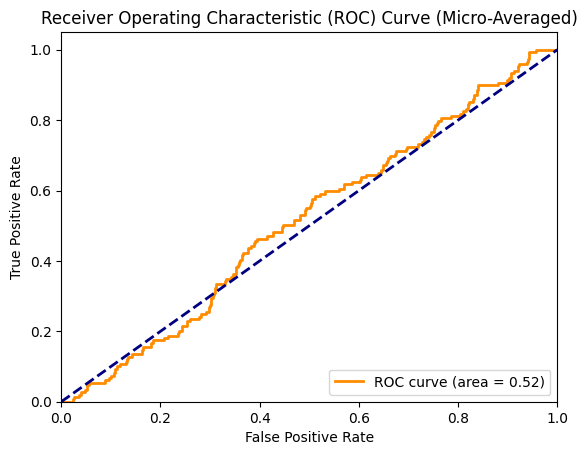

In [346]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Determine the unique classes in your target variable
classes = y.unique()

# Binarize the output
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Learn to predict each class against the other
classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

# Plotting the micro-average ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Micro-Averaged)')
plt.legend(loc="lower right")
plt.show()

In [347]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],               # Penalty (L1 or L2 regularization)
    'solver': ['liblinear']                # Optimization algorithm
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Score: 0.24161073825503357


In [348]:
from sklearn.metrics import accuracy_score, classification_report

# Split Data (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score on Unseen Data: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score on Unseen Data: 0.24161073825503357
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.63      0.53        19
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         3
           5       0.10      0.17      0.12        12
           6       0.00      0.00      0.00         2
           7       0.18      0.12      0.15        24
           8       0.12      0.38      0.19        16
           9       0.00      0.00      0.00         2
          10       0.33      0.04      0.07        25
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          13       0.40      0.44      0.42        18
          14       0.44      0.50      0.47         8

    accuracy                           0.24       149
   mac

### CONCLUSION:

### Data Analysis:
###### 
Data was cleaned by handling missing values and outlier.
Summary statistics, histograms, and correlation analysis were conducted to understand the distribution and relationships between variablredictive accuracy.




### Insights:
##### 
Matches were won by both runs and wickets, with varying frequencie.
Toss decisions and their impact on match outcomes were explord.
Team performance across seasons and cities was analyzed.


### Modeling:
##### 
Various machine learning models including Random Forest, Logistic Regression, SVM, KNN, Gradient Boosting, and AdaBoost were trained and evaluate.
Feature importance was assessed using Random Foret.
Hyperparameter tuning was performed for Logistic Regression using GridSearcCV.


### Evaluation:
##### 
Models were evaluated based on accuracy, mean squared error, and other classification metric.
ROC curve analysis was conducted for logistic regressin.


### Conclusion:

##### The best performing model was logistic regression with tuned hyperparameters.The analysis provides valuable insights into factors influencing IPL match outcomes, such as toss decisions and team performance.Further refinement of models and inclusion of additional features could enhance predictive accuracy.